Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

Считывание файла:

In [2]:
df = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None)

Переименование названий столбцов, замена 'ham' и 'spam' на 0 и 1:

In [3]:
df.columns = ['spam', 'text']
df.loc[df['spam'] == 'spam', ['spam']] = 1
df.loc[df['spam'] == 'ham', ['spam']] = 0
df

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Соотношение спама/не спама:

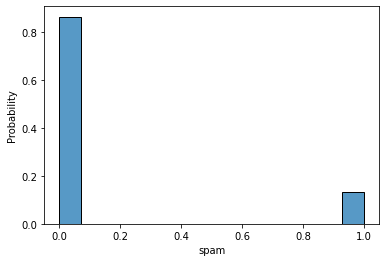

In [4]:
sns.histplot(data=df, x='spam', stat='probability');

In [5]:
print('Процент спама равен {}'.format(len(df[df['spam'] == 1]) / len(df['spam'])))
print('Процент не спама равен {}'.format(len(df[df['spam'] == 0]) / len(df['spam'])))

Процент спама равен 0.13406317300789664
Процент не спама равен 0.8659368269921034


Удаление знаков препинания, приведение всех букв к нижнему регистру и разбиение текста на список слов:

In [6]:
df['text'] = df['text'].str.replace(
   '\W', ' ')
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.split()
df

<ipython-input-6-b3a345c77db9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(


,spam,text
0,0,"[go, until, jurong, point, crazy, available, o..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...
5567,1,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,"[will, ü, b, going, to, esplanade, fr, home]"
5569,0,"[pity, was, in, mood, for, that, so, any, othe..."
5570,0,"[the, guy, did, some, bitching, but, i, acted,..."


Подсчет слов в каждом сообщении и добавление информации о количестве слов в исходный датафрейм:

In [7]:
df.columns = ['spam_', 'text_']

list_of_words = []
for text in df['text_']:
    for word in text:
        list_of_words.append(word)
list_of_words = set(list_of_words)
    
words_in_text = {word: [0] * len(df['spam_']) for word in list_of_words}
for index, text in enumerate(df['text_']):
   for word in text:
      words_in_text[word][index] += 1
        
words_in_text = pd.DataFrame(words_in_text)
df = pd.concat([df, words_in_text], axis=1)
df

,spam_,text_,help08700621170150p,watchng,tcr,08712405020,usher,08717168528,pod,marriage,...,vat,toaday,wheat,shoes,eshxxxxxxxxxxx,butt,1225,sis,21,n
0,0,"[go, until, jurong, point, crazy, available, o...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,"[ok, lar, joking, wif, u, oni]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,"[u, dun, say, so, early, hor, u, c, already, t...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"[nah, i, don, t, think, he, goes, to, usf, he,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,"[this, is, the, 2nd, time, we, have, tried, 2,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,"[will, ü, b, going, to, esplanade, fr, home]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,"[pity, was, in, mood, for, that, so, any, othe...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,"[the, guy, did, some, bitching, but, i, acted,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Разделение выборок на обучающую и тестовую, расчет долей спама/не спама в них:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['text_'], df['spam_'], test_size=0.3)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print('Процент спама в обучающей выборке равен {}'.format(y_train.sum() / len(y_train)))
print('Процент не спама в обучающей выборке равен {}'.format((len(y_train) - y_train.sum()) / len(y_train)))
print('Процент спама в тестовой выборке равен {}'.format(y_test.sum() / len(y_test)))
print('Процент не спама в тестовой выборке равен {}'.format((len(y_test) - y_test.sum()) / len(y_test)))

Процент спама в обучающей выборке равен 0.13333333333333333
Процент не спама в обучающей выборке равен 0.8666666666666667
Процент спама в тестовой выборке равен 0.13576555023923445
Процент не спама в тестовой выборке равен 0.8642344497607656


Обучение:

In [9]:
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))
X_test = count_vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
MNB = MultinomialNB()

MNB.fit(X_train, y_train)
y_train_predict = MNB.predict(X_train)
y_predict = MNB.predict(X_test)

print("Тренировочная выборка")
print(classification_report(y_train, y_train_predict))
print("Тестовая выборка")
print(classification_report(y_test, y_predict))

Тренировочная выборка
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3380
           1       0.98      0.97      0.98       520

    accuracy                           0.99      3900
   macro avg       0.99      0.98      0.99      3900
weighted avg       0.99      0.99      0.99      3900

Тестовая выборка
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1445
           1       0.98      0.90      0.94       227

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

